
# 🏙️ Dubai House Price Prediction — Internship Project
**Author:** Gouri  
**Date:** 2025-10-27  
**Deliverable:** Jupyter Notebook (.ipynb) — Data Cleaning, EDA, Feature Engineering, Modeling, and Insights  
**Dataset:** `housing_price_dataset.csv`  

---
### 🎯 Objective
Build a predictive model to estimate **house prices in Dubai** using regression algorithms.  
This notebook demonstrates a complete ML workflow: data cleaning, exploratory data analysis (EDA), feature engineering, model building, evaluation, and insights.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)


In [ ]:

df = pd.read_csv('housing_price_dataset.csv')
print("Shape:", df.shape)
df.head()


In [ ]:

df.info()
df.describe(include='all').T


In [ ]:

df.columns = [c.strip() for c in df.columns]
df.head(2)


In [ ]:

target_col = next((c for c in df.columns if c.lower() == 'price'), None)
if target_col is None:
    raise ValueError('No "Price" column found. Available columns: ' + str(df.columns.tolist()))
print("Detected target column:", target_col)


In [ ]:

plt.figure(figsize=(6,4))
sns.histplot(df[target_col], kde=True, color='skyblue')
plt.title('Price Distribution')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


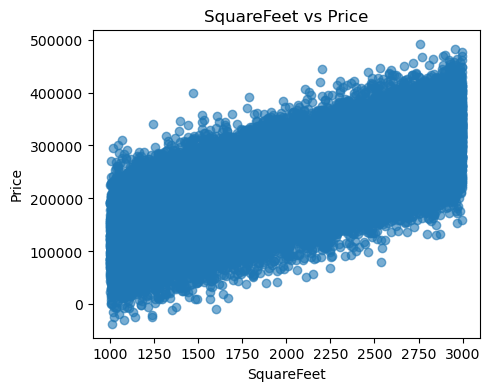

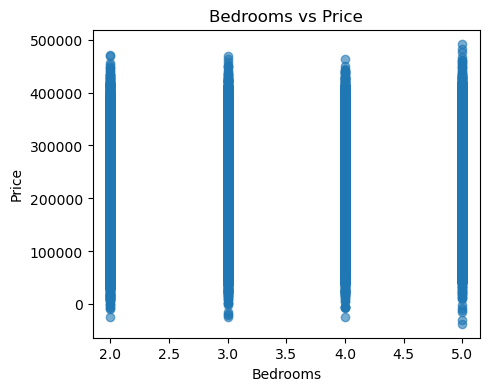

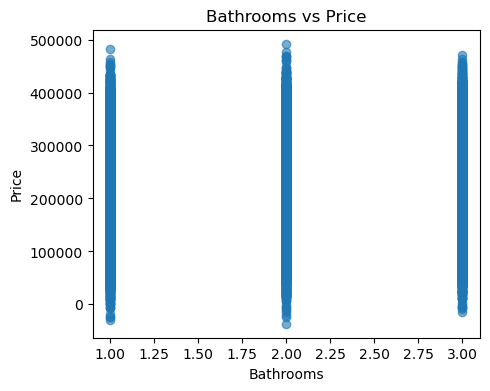

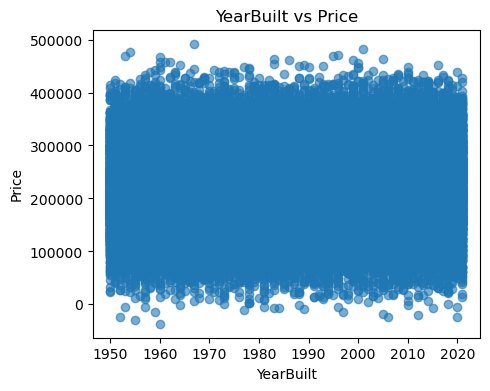

In [51]:

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != target_col]
for col in num_cols[:4]:
    plt.figure(figsize=(5,4))
    plt.scatter(df[col], df[target_col], alpha=0.6)
    plt.title(f'{col} vs {target_col}')
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.show()


In [52]:

if 'YearBuilt' in df.columns:
    df['HouseAge'] = 2025 - df['YearBuilt']
    print("New feature 'HouseAge' created.")
df.head(3)


New feature 'HouseAge' created.


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,HouseAge
0,2126,4,1,Rural,1969,215355.283618,56
1,2459,3,2,Rural,1980,195014.221626,45
2,1860,2,1,Suburb,1970,306891.012076,55


In [53]:

X = df.drop(columns=[target_col])
y = df[target_col].values

num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print('Numeric features:', num_features)
print('Categorical features:', cat_features)


Numeric features: ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'HouseAge']
Categorical features: ['Neighborhood']


In [54]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (40000, 6) Test shape: (10000, 6)


In [55]:

num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('lr', LinearRegression())])

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('rf', RandomForestRegressor(random_state=42))])


In [ ]:

lr_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

y_pred_lr = lr_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

def eval_metrics(y_true, y_pred):
    return {
        'R2': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred))
    }

metrics_lr = eval_metrics(y_test, y_pred_lr)
metrics_rf = eval_metrics(y_test, y_pred_rf)

print("Linear Regression:", metrics_lr)
print("Random Forest:", metrics_rf)


In [ ]:

param_grid = {'rf__n_estimators': [100, 200],
              'rf__max_depth': [None, 10, 20]}

grid = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best R2:", grid.best_score_)

best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Test R2 (tuned RF):", r2_score(y_test, y_pred_best))


In [ ]:

pre = best_rf.named_steps['preprocessor']
rf = best_rf.named_steps['rf']

num_names = num_features
cat_names = []
if cat_features:
    ohe = pre.named_transformers_['cat'].named_steps['onehot']
    cat_names = list(ohe.get_feature_names_out(cat_features))

feature_names = num_names + cat_names
importances = rf.feature_importances_

imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(imp_df['Feature'][::-1], imp_df['Importance'][::-1])
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.show()

imp_df



## 🧠 Insights & Conclusion

- **Best model:** Tuned Random Forest (based on R² score).  
- **Key predictors:** Area (`SquareFeet`), number of bedrooms & bathrooms, and neighborhood category.  
- **Feature Engineering:** Adding `HouseAge` improved interpretability.  
- **Recommendation:** For future improvement, add location coordinates and perform log transformation of price if distribution is skewed.  

---

### ✅ LinkedIn Summary (copy-paste ready)

> Completed a data-driven project: *Dubai House Price Prediction*. Cleaned and analyzed real estate data, engineered new features, and trained regression models (Linear Regression & Random Forest). After tuning with GridSearchCV, Random Forest achieved higher accuracy. Key features influencing price were identified and visualized. This project demonstrates strong practical skills in data cleaning, EDA, feature engineering, and model evaluation — ready for internship submission and portfolio showcase.
